In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt


In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=144) 
df  

{'data': {'ids': None,
  'features':     Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
  0          A11           6        A34        A43        1169        A65   
  1          A12          48        A32        A43        5951        A61   
  2          A14          12        A34        A46        2096        A61   
  3          A11          42        A32        A42        7882        A61   
  4          A11          24        A33        A40        4870        A61   
  ..         ...         ...        ...        ...         ...        ...   
  995        A14          12        A32        A42        1736        A61   
  996        A11          30        A32        A41        3857        A61   
  997        A14          12        A32        A43         804        A61   
  998        A11          45        A32        A43        1845        A61   
  999        A12          45        A34        A41        4576        A62   
  
      Attribute7  Attribute8 Attribute

In [4]:
X = df.data.features 
y = df.data.targets 

In [5]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [6]:
y['class'] = y['class'].map({1: 1, 2: 0})

/tmp/ipykernel_36/2437361946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map({1: 1, 2: 0})


In [7]:
categorical_cols = [
    'Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 
    'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 
    'Attribute17', 'Attribute19', 'Attribute20'
]
numerical_cols = [
    'Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 
    'Attribute13', 'Attribute16', 'Attribute18'
]
all_features = categorical_cols + numerical_cols

In [9]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), stratify=y, test_size=0.2, random_state=42
)

In [25]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', rf)
])

In [26]:
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [8, 12, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__max_features': ['sqrt', 'log2', None],
}
grid = GridSearchCV(
    pipeline, param_grid, cv=10, scoring='f1', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("\nBest Params:")
print(grid.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits

Best Params:
{'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 2, 'clf__n_estimators': 200}


In [31]:
y_proba = grid.predict_proba(X_test)[:,1]
y_pred = (y_proba >= 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        60
           1       0.77      0.86      0.81       140

    accuracy                           0.72       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.70      0.72      0.71       200



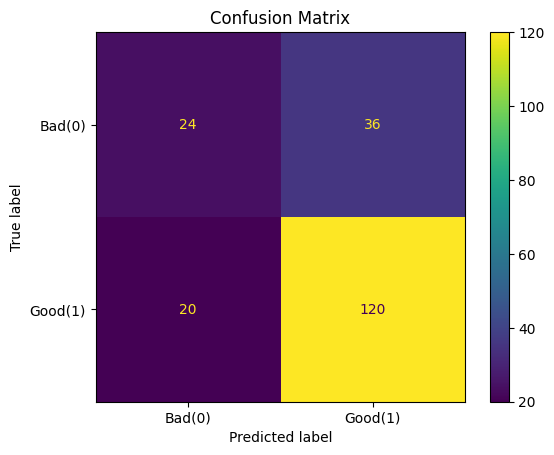

In [32]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Bad(0)', 'Good(1)']).plot()
plt.title("Confusion Matrix")
plt.show()

In [33]:
#according to the given dataset cost matrix
cost = cm[0,1]*5 + cm[1,0]*1
print(f"Total Cost-sensitive Misclassification Cost: {cost}")


Total Cost-sensitive Misclassification Cost: 200


In [41]:
#finding proper threshold
def threshold_cost_evaluation(y_true, y_proba, thresholds, cost_fp=5, cost_fn=1):
    costs = []
    for thresh in thresholds:
        preds = (y_proba >= thresh).astype(int)
        cm = confusion_matrix(y_true, preds)
        cost = cm[0,1]*cost_fp + cm[1,0]*cost_fn
        costs.append(cost)
    return costs

costs = threshold_cost_evaluation(y_test, y_proba, thresholds, 5, 1)
best_idx = np.argmin(costs)
best_threshold = thresholds[best_idx]

print(f"Optimal threshold minimizing cost: {best_threshold:.3f}")
print(f"Minimum cost at this threshold: {costs[best_idx]}")

Optimal threshold minimizing cost: 0.755
Minimum cost at this threshold: 94



Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.46      0.90      0.61        60
           1       0.93      0.54      0.68       140

    accuracy                           0.65       200
   macro avg       0.69      0.72      0.65       200
weighted avg       0.79      0.65      0.66       200



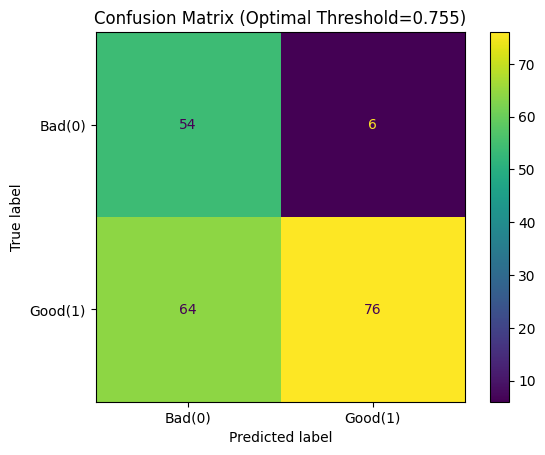

In [43]:
y_pred_best = (y_proba >= best_threshold).astype(int)
print("\nClassification Report (Optimized Threshold):")
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm_best, display_labels=['Bad(0)', 'Good(1)']).plot()
plt.title(f"Confusion Matrix (Optimal Threshold={best_threshold:.3f})")
plt.show()